In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
#Read the data
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data=data.rename(columns={"R&D Spend":"RnD","Administration":"Admin","Marketing Spend":"Marketing"})
data

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RnD        50 non-null     float64
 1   Admin      50 non-null     float64
 2   Marketing  50 non-null     float64
 3   State      50 non-null     object 
 4   Profit     50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#check for missing values
data.isna().sum()

RnD          0
Admin        0
Marketing    0
State        0
Profit       0
dtype: int64

In [7]:
data[data.duplicated()]

,RnD,Admin,Marketing,State,Profit


No null or duplicated values are there in data

In [8]:
data.describe()

,RnD,Admin,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RnD'>

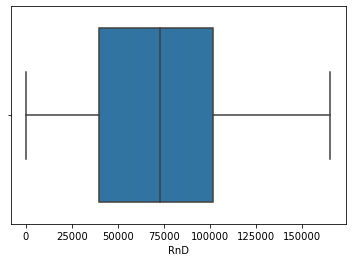

In [9]:
sns.boxplot(data['RnD'])

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Admin'>

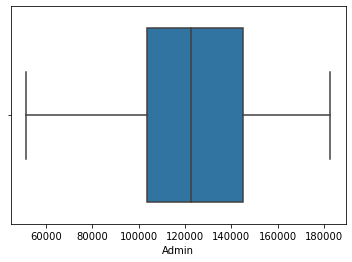

In [10]:
sns.boxplot(data['Admin'])

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing'>

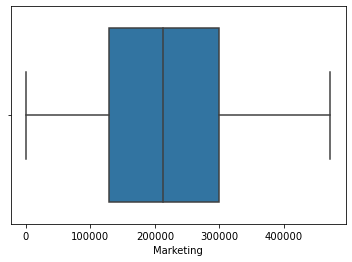

In [11]:
sns.boxplot(data['Marketing'])

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

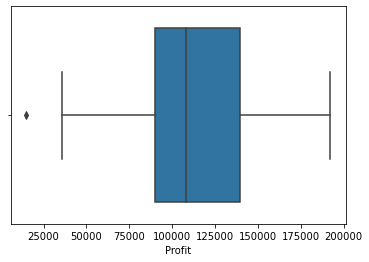

In [12]:
sns.boxplot(data['Profit'])

There is an outlier in Profit with value 14681.4

In [13]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

state is a categorical data, so we can use one hot encoding

In [14]:
data = pd.get_dummies(data, columns=['State'])
data.head()

,RnD,Admin,Marketing,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [15]:
data=data.rename(columns={"State_New York":"State_NewYork"})
data

,RnD,Admin,Marketing,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


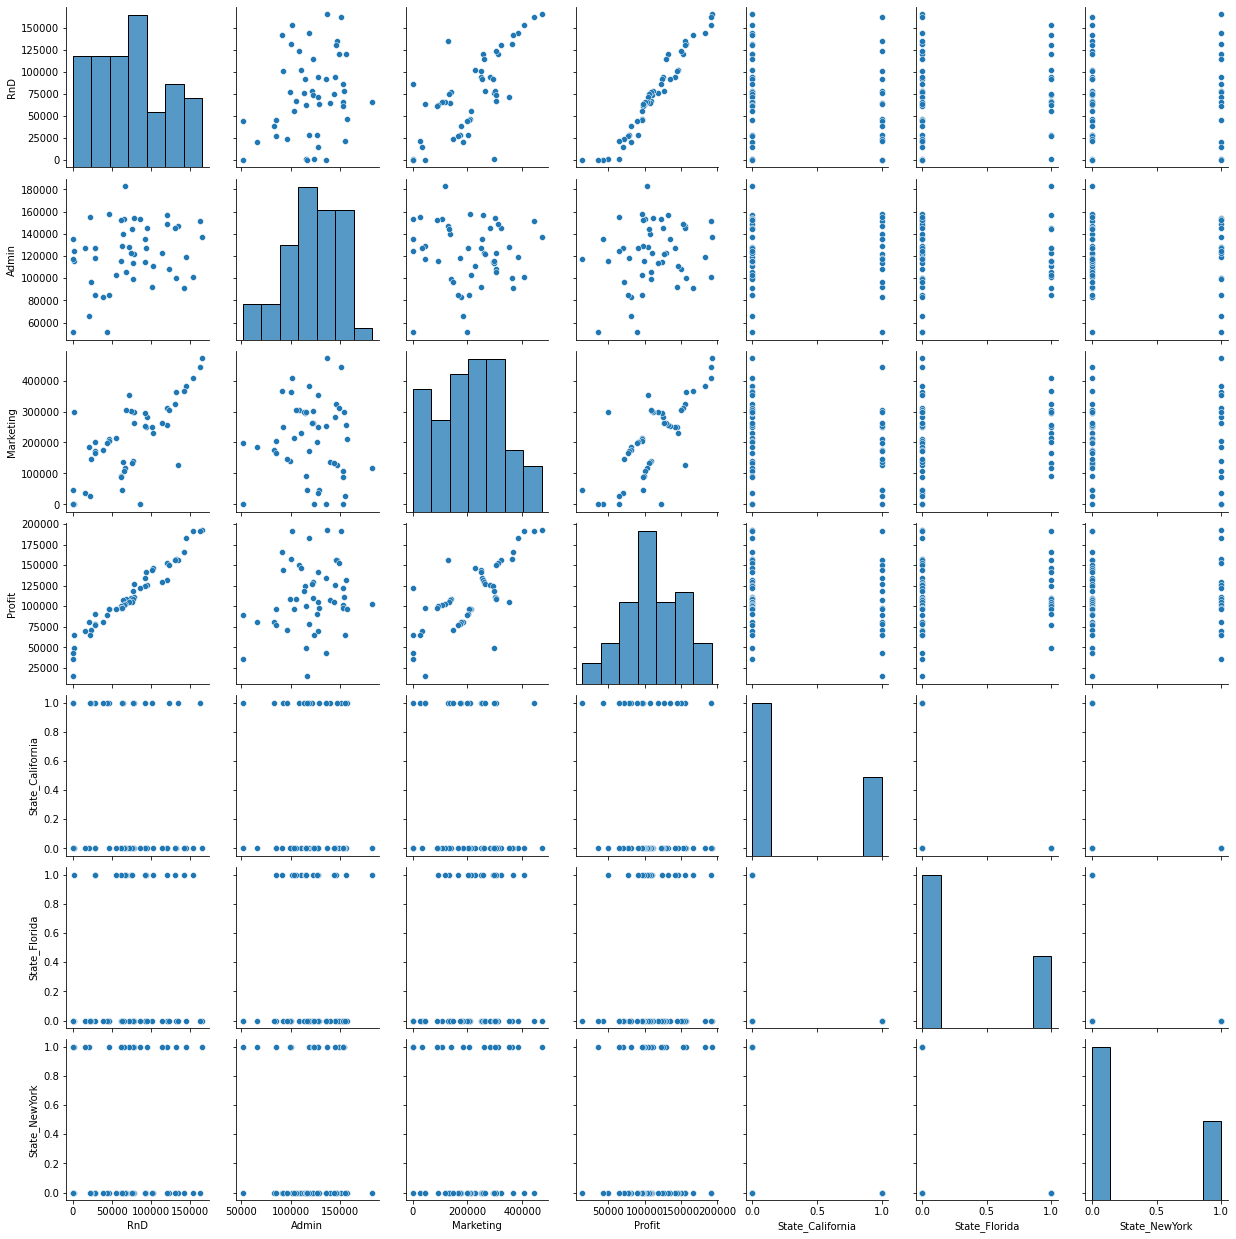

In [16]:
sns.pairplot(data)

In [17]:
data.corr()

,RnD,Admin,Marketing,Profit,State_California,State_Florida,State_NewYork
RnD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


The above plots and correlation table shows 
1. positive correlation between profit and RnD
2. positive correlation between profit and Marketing
3. positive correlation between RnD and Marketing

Let's standardize the data as some columns ahev big numbers and also we have made changes to state column using dummies

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
data_std = std.fit_transform(data)
data_std = pd.DataFrame(data_std, columns = data.columns)
data_std

,RnD,Admin,Marketing,Profit,State_California,State_Florida,State_NewYork
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741
5,1.279800,-0.776239,1.254210,1.127250,-0.717741,-0.685994,1.393261
6,1.340066,0.932147,-0.688150,1.105481,1.393261,-0.685994,-0.717741
7,1.245057,0.871980,0.932186,1.096210,-0.717741,1.457738,-0.717741
8,1.030369,0.986952,0.830887,1.007470,-0.717741,-0.685994,1.393261
9,1.091819,-0.456640,0.776107,0.946022,1.393261,-0.685994,-0.717741


# Start creating model

In [19]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RnD+Admin+Marketing+State_California+State_Florida+State_NewYork',data=data_std).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           1.34e-27
Time:                        07:39:00   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RnD                  0.9179      0.053     17.369      0.000       0.811       1.024
Admin               -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing            0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
State_NewYork       -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

If we observe the p values in above table, we can see that the p values are more than 0.05 for Administration, Marketing, State_California, State_Florida and State_NewYork as well. It emans these columns are insignificant. So we can remove them. But tfor confirmation, we will check the significance of all these culumns individually


In [21]:
modelAdmin = smf.ols('Profit~Admin',data=data_std).fit()

In [22]:
modelAdmin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 15 Jul 2021   Prob (F-statistic):              0.162
Time:                        07:39:00   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.141  -3.68e-15      1.000      -0.284       0.284
Admin          0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here for Administration, the p value is 0.162 which is > 0.05. So Administration data is not significant in predicting profit

In [23]:
modelMarketing = smf.ols('Profit~Marketing',data=data_std).fit()

In [24]:
modelMarketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           4.38e-10
Time:                        07:39:01   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.096  -5.43e-15      1.000      -0.193       0.193
Marketing      0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here for Marketing spend, p value is 0 which is < 0.05 so individually Marketing spend is significant while predicting profit.

<i>But when we used Marketing along with other columns to fit the model, the p -value came as 0.123 (greater than 0.05). This means that Marketing spend individually is affecting the Profit but when it is used by other features it is not. So we can say there is a multicollinearity problem and we will use VIF futher to check it.</i>

In [25]:
modelStateCalif = smf.ols('Profit~State_California',data=data_std).fit()

In [26]:
modelStateCalif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Thu, 15 Jul 2021   Prob (F-statistic):              0.312
Time:                        07:39:01   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.143  -3.64e-15      1.000      -0.287       0.287
State_California    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here for State_California, the p value is 0.312 which is > 0.05. So State_California data is not significant in predicting profit

In [27]:
modelStateFlorida = smf.ols('Profit~State_Florida',data=data_std).fit()

In [28]:
modelStateFlorida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Thu, 15 Jul 2021   Prob (F-statistic):              0.421
Time:                        07:39:01   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.204e-16      0.143  -3.63e-15      1.000      -0.288       0.288
State_Florida     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here for State_Florida, the p value is 0.421 which is > 0.05. So State_Florida data is not significant in predicting profit

In [29]:
modelStateNY = smf.ols('Profit~State_NewYork',data=data_std).fit()

In [30]:
modelStateNY.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Thu, 15 Jul 2021   Prob (F-statistic):              0.829
Time:                        07:39:01   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.204e-16      0.144  -3.61e-15      1.000      -0.290       0.290
State_NewYork     0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here for State_NewYork, the p value is 0.829 which is > 0.05. So State_NewYork data is not significant in predicting profit

# Checking VIF

In [31]:
rsq_mkt = smf.ols('Marketing~RnD+Admin+State_California+State_Florida+State_NewYork',data=data_std).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt) 
vif_mkt

2.416796756686394

In [32]:
rsq_rd = smf.ols('RnD~Admin+Marketing+State_California+State_Florida+State_NewYork',data=data_std).fit().rsquared  
vif_rd = 1/(1-rsq_rd)
vif_rd

2.4955109215494438

As we have seen RnD is significant while predicting profit, we calculated VIF for it. We can see VIF for marketing spend is less than that of RnD spend, so we can say that profit depends on Marketing send as well.

<b>So finally the profit is dependent on RnD spend and Marketing spend. So now build a model using these 2 columns</b>

In [33]:
modelRnDMarketing = smf.ols('Profit~RnD+Marketing',data=data_std).fit()

In [34]:
modelRnDMarketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           2.16e-31
Time:                        07:39:01   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.032   -1.6e-14      1.000      -0.065       0.065
RnD            0.9072      0.047     19.266      0.000       0.812       1.002
Marketing      0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
modelRnD = smf.ols('Profit~RnD',data=data_std).fit()

In [36]:
modelRnD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           3.50e-32
Time:                        07:39:01   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RnD            0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In model modelRnDMarketing, we can see p value for markieting is 0.06 > 0.05 and we can see below the R2 and AIC values for both RnD and Marketing. R2 should be greater and AIC should be lower.

In [37]:
modelRnD.rsquared_adj, modelRnD.aic

(0.9454214684987816, -0.5428445147422991)

In [38]:
modelMarketing.rsquared_adj, modelMarketing.aic

(0.5499692740826254, 104.94091802371327)

<b>Here we can conclude that RnD is sufficient to predict profit, no need of Marketing spend.</b>

# Model Validation

<b>Residual Plot</b>

In [39]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

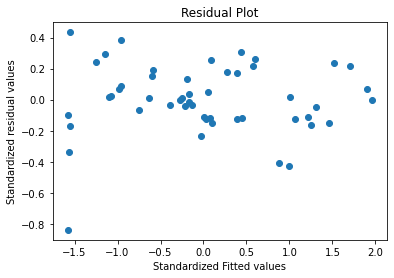

In [40]:
plt.scatter(modelRnD.fittedvalues,
            modelRnD.resid)

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

It's not showing any pattern, it's a random cloud. So model is fine.

<b>QQ Plot</b>

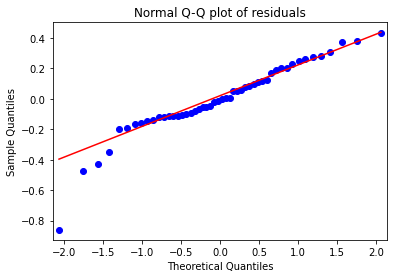

In [41]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelRnD.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Model Deletion Diagnostics

<b>Detecting Influencers/Outliers using Cook's distance</b>

In [42]:
model_influence = modelRnD.get_influence()
(c, _) = model_influence.cooks_distance

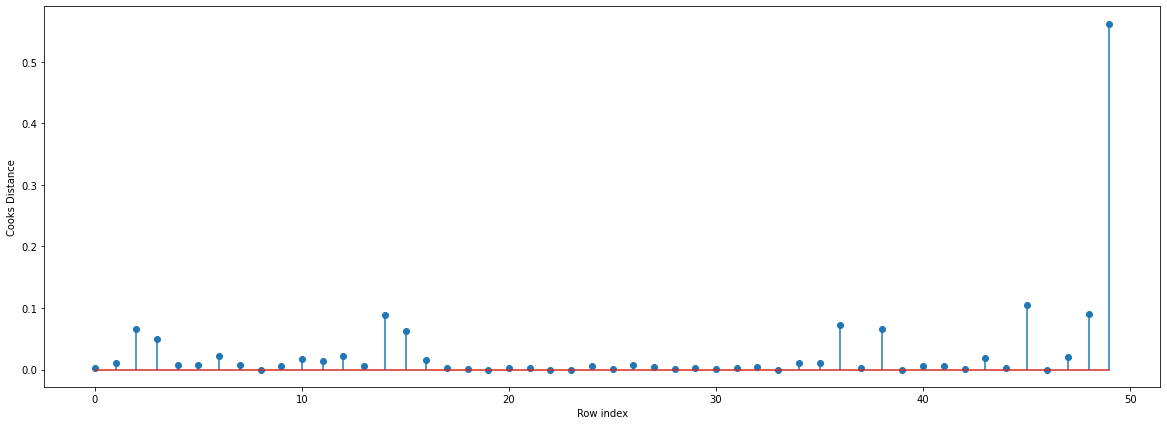

In [43]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_std)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
#index of the data points where c is more than 1
(np.argmax(c),np.max(c))

(49, 0.562061025926428)

Since the value 0.56 is <1 , we can stop the diagnostic process and finalize the model. If it wpuld be > 1, then we could have deleted that data point. So modelRnD is the final one. So let's use it for prediction.


# Predicting new data

In [45]:
newData = {'RnD':[100000,300000]}
new_data=pd.DataFrame(newData)



In [46]:
new_data

,RnD
0,100000
1,300000


In [47]:
modelRnD.predict(new_data)

0     97290.046566
1    291870.139698
dtype: float64

<b>For a R&D Spend value of 100000,300000 we will have a Profit of 97290, 291870 approx respectively</b>